In [3]:
import base64
import bokeh
import collections
import hashlib
import json
import IPython
import pandas as pd
import math
import matplotlib
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import networkx as nx
import numpy as np
import os
import scipy
import seaborn as sns
import sys
import unicodedata

from bokeh.io import output_notebook, show
from bokeh.models import LinearAxis, Range1d, HoverTool, PanTool, ResetTool, WheelZoomTool, CrosshairTool, BoxZoomTool
from bokeh.plotting import figure as bokeh_figure
from bokeh.plotting import ColumnDataSource

from bs4 import BeautifulSoup
from matplotlib.backends.backend_pdf import PdfPages
from math import radians, cos, sin, asin, sqrt
from multiprocessing import Pool
from pprint import pprint
from shapely.geometry import Point, LineString, mapping
from time import time

from scipy.fftpack import fft, ifft, ifft2

from IPython.display import display, display_png, display_html
from IPython.core.display import HTML, Javascript
from IPython.display import Image


IPython.display.display(IPython.display.HTML("<style>.container { width:100%; }</style>"))

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

output_notebook()

Loading BokehJS ...

In [4]:
%%html
<center><img src="https://d397xw3titc834.cloudfront.net/images/original/3/10/310c1e90cdf5e7c22e741ca0fa09d2a3.jpg" width="480" height="360" /></center>

# Pandas - Data Analysis Tool http://pandas.pydata.org/

L'objectif de Pandas est de fournir une toolbox permettant l'analyse et la représentation de différentes sources de données (fichier CSV, Excel, etc.) de manière efficace en offrant des méthodes performantes pour manipuler ces données.

## Concept

L'objet principal dans Pandas est le Dataframe, un "tableau" composé essentiellement de 3 parties,

- des colonnes (modélisées par des objets pandas.Series)
- des lignes (records)
- un système d'indexation des lignes permettant d'effectuer des filtres / sélections de manière performante

## Premiers pas...

On peut facilement créer un Dataframe directement à partir d'un fichier `csv` en utilisant la fonction `read_csv()` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas-read-csv).

Les premières lignes (par défaut 5) du Dataframe peuvent être affichées facilement en utilisant la fonction `head()`

In [6]:
df = pd.read_csv('./ressources/flights.csv')

In [7]:
df.head()

,DepLat;DepLon;ArrLat;ArrLon;NbFlights;CO2Intensity
0,33.50472;126.4931;37.55833;126.7906;88;103.555...
1,37.55833;126.7906;33.50472;126.4931;84;99.4924...
2,-37.67333;144.8433;-33.94611;151.1772;83;79.57...
3,-33.94611;151.1772;-37.67333;144.8433;83;82.89...
4,4.191944;73.52917;3.47;72.83;77;23.10000092


In [8]:
df = pd.read_csv('./ressources/flights.csv', sep=';')

In [9]:
df.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity
0,33.504720,126.49310,37.55833,126.7906,88,103.555930
1,37.558330,126.79060,33.50472,126.4931,84,99.492429
2,-37.673330,144.84330,-33.94611,151.1772,83,79.571319
3,-33.946110,151.17720,-37.67333,144.8433,83,82.895090
4,4.191944,73.52917,3.47000,72.8300,77,23.100001


In [10]:
df.head(10)

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity
0,33.504720,126.49310,37.55833,126.7906,88,103.555930
1,37.558330,126.79060,33.50472,126.4931,84,99.492429
2,-37.673330,144.84330,-33.94611,151.1772,83,79.571319
3,-33.946110,151.17720,-37.67333,144.8433,83,82.895090
4,4.191944,73.52917,3.47000,72.8300,77,23.100001
5,25.077780,121.22390,22.30889,113.9147,62,113.739500
6,33.942500,-118.40720,37.61889,-122.3750,57,51.871302
7,37.618890,-122.37500,33.94250,-118.4072,56,46.095797
8,-33.946110,151.17720,-27.38333,153.1167,56,51.994251
9,-27.383330,153.11670,-33.94611,151.1772,55,48.956909


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(24551, 6)

In [13]:
df['NbFlights'].head()

0    88
1    84
2    83
3    83
4    77
Name: NbFlights, dtype: int64

In [14]:
df.NbFlights.head()

0    88
1    84
2    83
3    83
4    77
Name: NbFlights, dtype: int64

In [15]:
type(df.NbFlights)

pandas.core.series.Series

In [16]:
df.NbFlights.min(), df.NbFlights.mean(), df.NbFlights.max()

(1, 3.0339701030507924, 88)

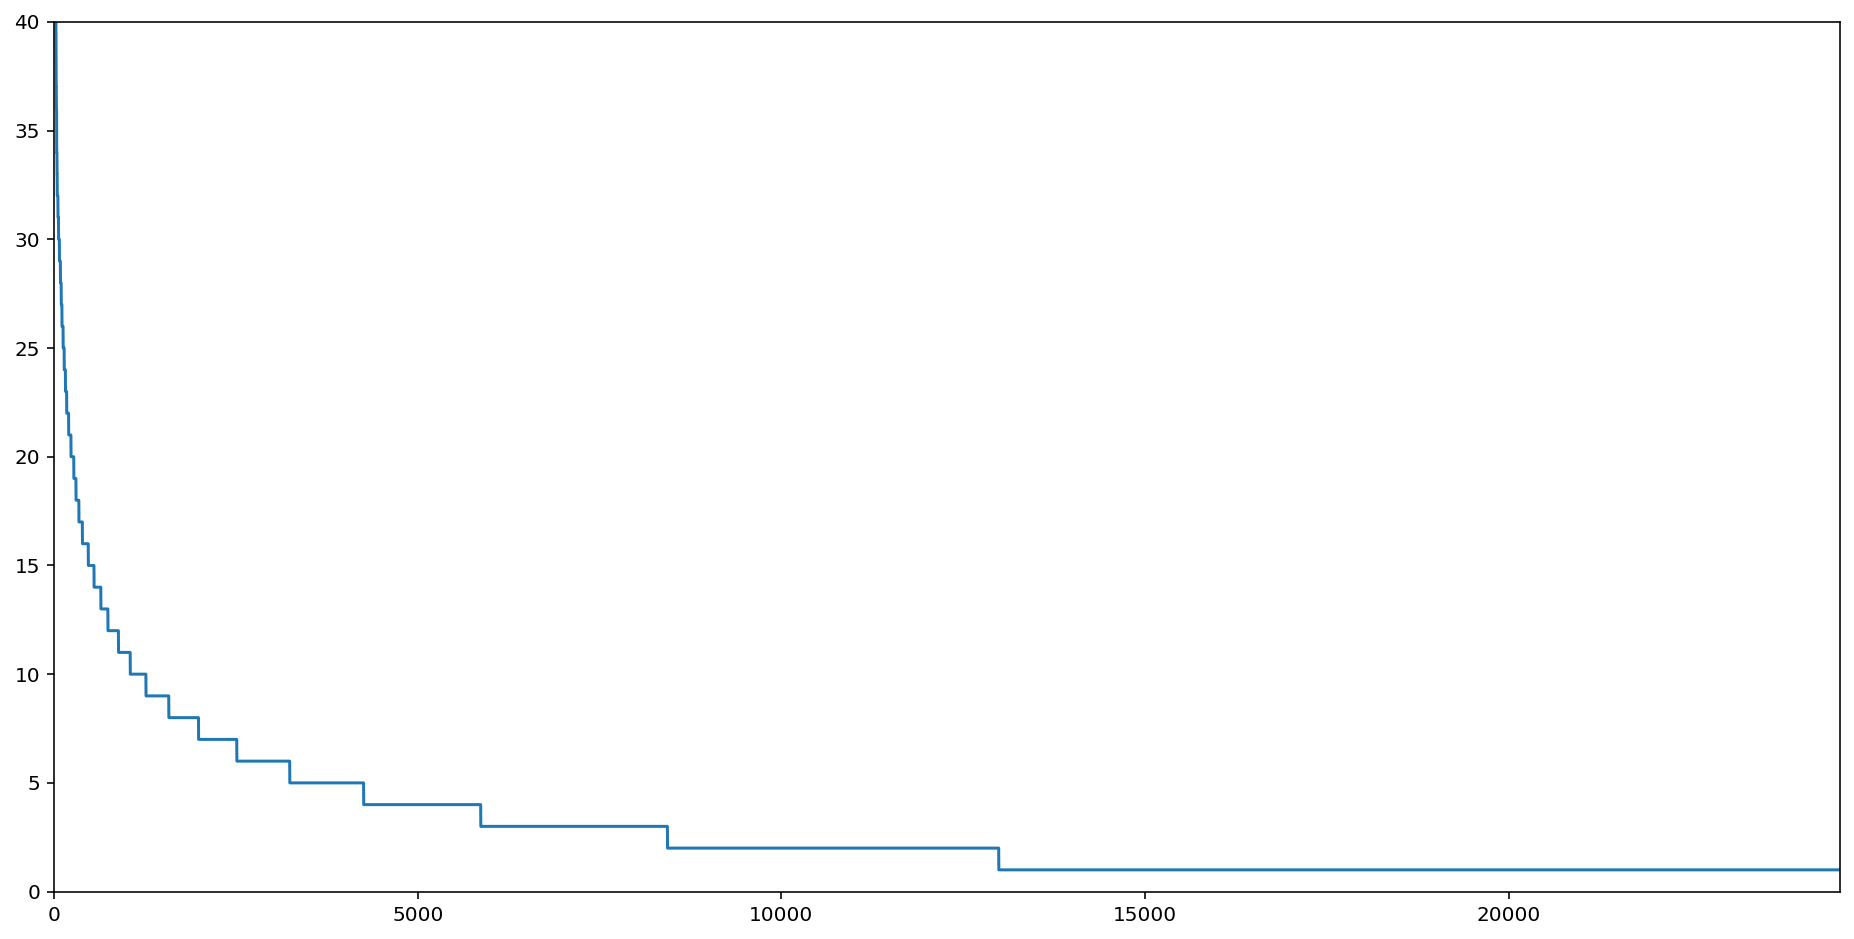

In [17]:
df.NbFlights.plot(figsize=(16, 8), ylim=(0, 40))

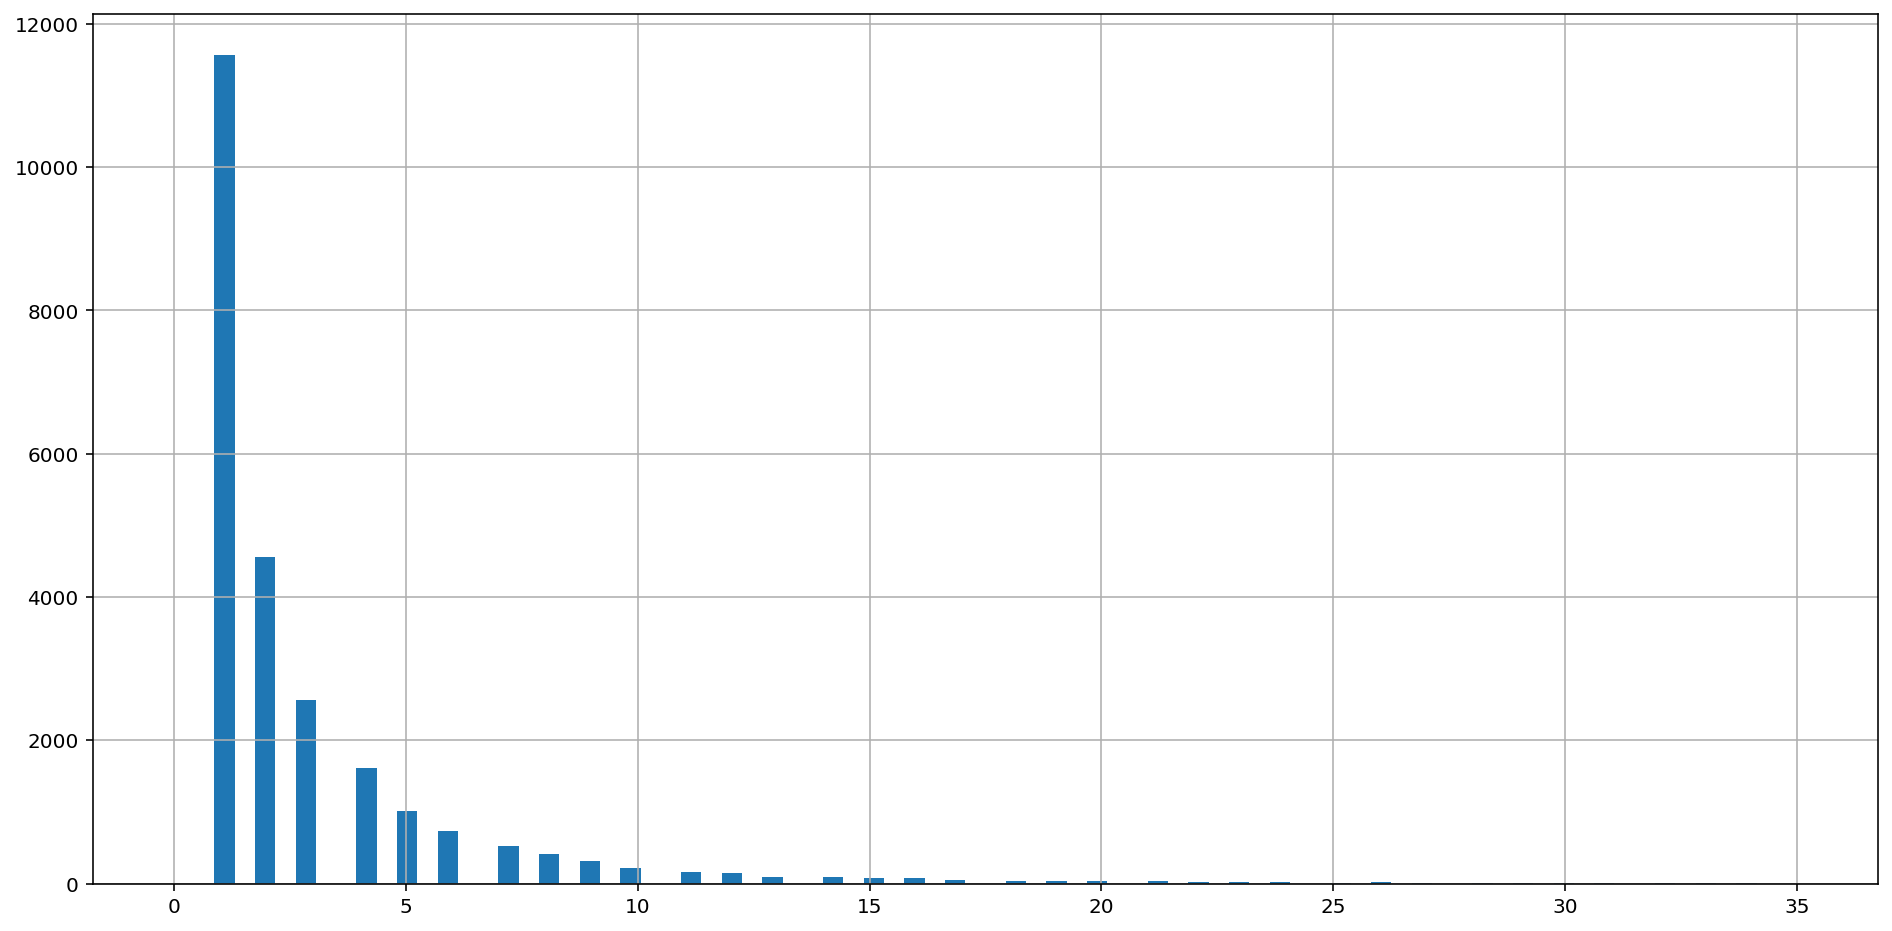

In [18]:
df.NbFlights.hist(figsize=(16, 8), bins=80, range=(0, 35))

In [19]:
df_NbFlights_CO2 = df[['NbFlights', 'CO2Intensity']]

In [20]:
type(df_NbFlights_CO2)

pandas.core.frame.DataFrame

In [21]:
df_NbFlights_CO2.head()

,NbFlights,CO2Intensity
0,88,103.555930
1,84,99.492429
2,83,79.571319
3,83,82.895090
4,77,23.100001


In [22]:
df_NbFlights_CO2 = df_NbFlights_CO2.sort_values(by='CO2Intensity', ascending=False)

In [23]:
df_NbFlights_CO2.head()

,NbFlights,CO2Intensity
5,62,113.739500
0,88,103.555930
1,84,99.492429
10,54,94.445900
3,83,82.895090


In [24]:
df_NbFlights_CO2 = df_NbFlights_CO2.reset_index(drop=True)

In [25]:
df_NbFlights_CO2.head()

,NbFlights,CO2Intensity
0,62,113.739500
1,88,103.555930
2,84,99.492429
3,54,94.445900
4,83,82.895090


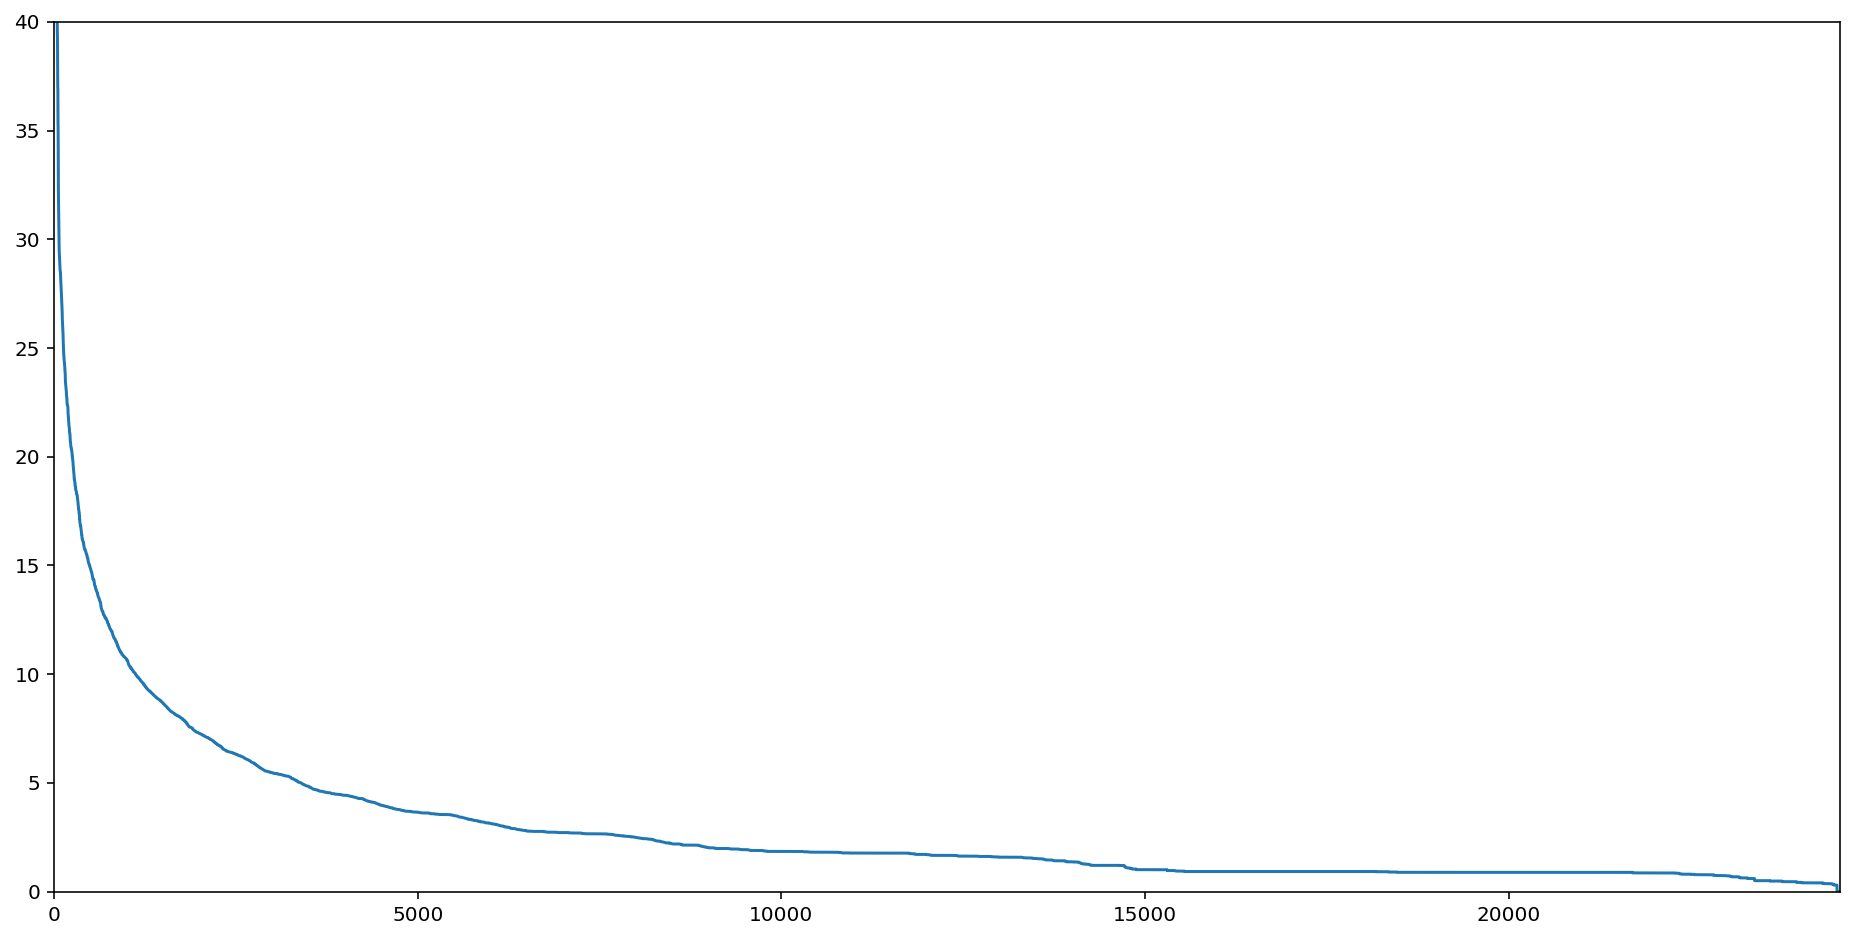

In [26]:
df_NbFlights_CO2.CO2Intensity.plot(figsize=(16, 8), ylim=(0, 40))

In [27]:
df_lim = df[(df.NbFlights >= 15) & (df.NbFlights <= 20)].sort_values(by='CO2Intensity').reset_index(drop='True')

In [28]:
df_lim.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482
1,5.15000,73.13000,4.191944,73.52917,20,6.000000
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500


In [29]:
df_lim.shape

(317, 6)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f86f82a6f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f86f82a6f28>)

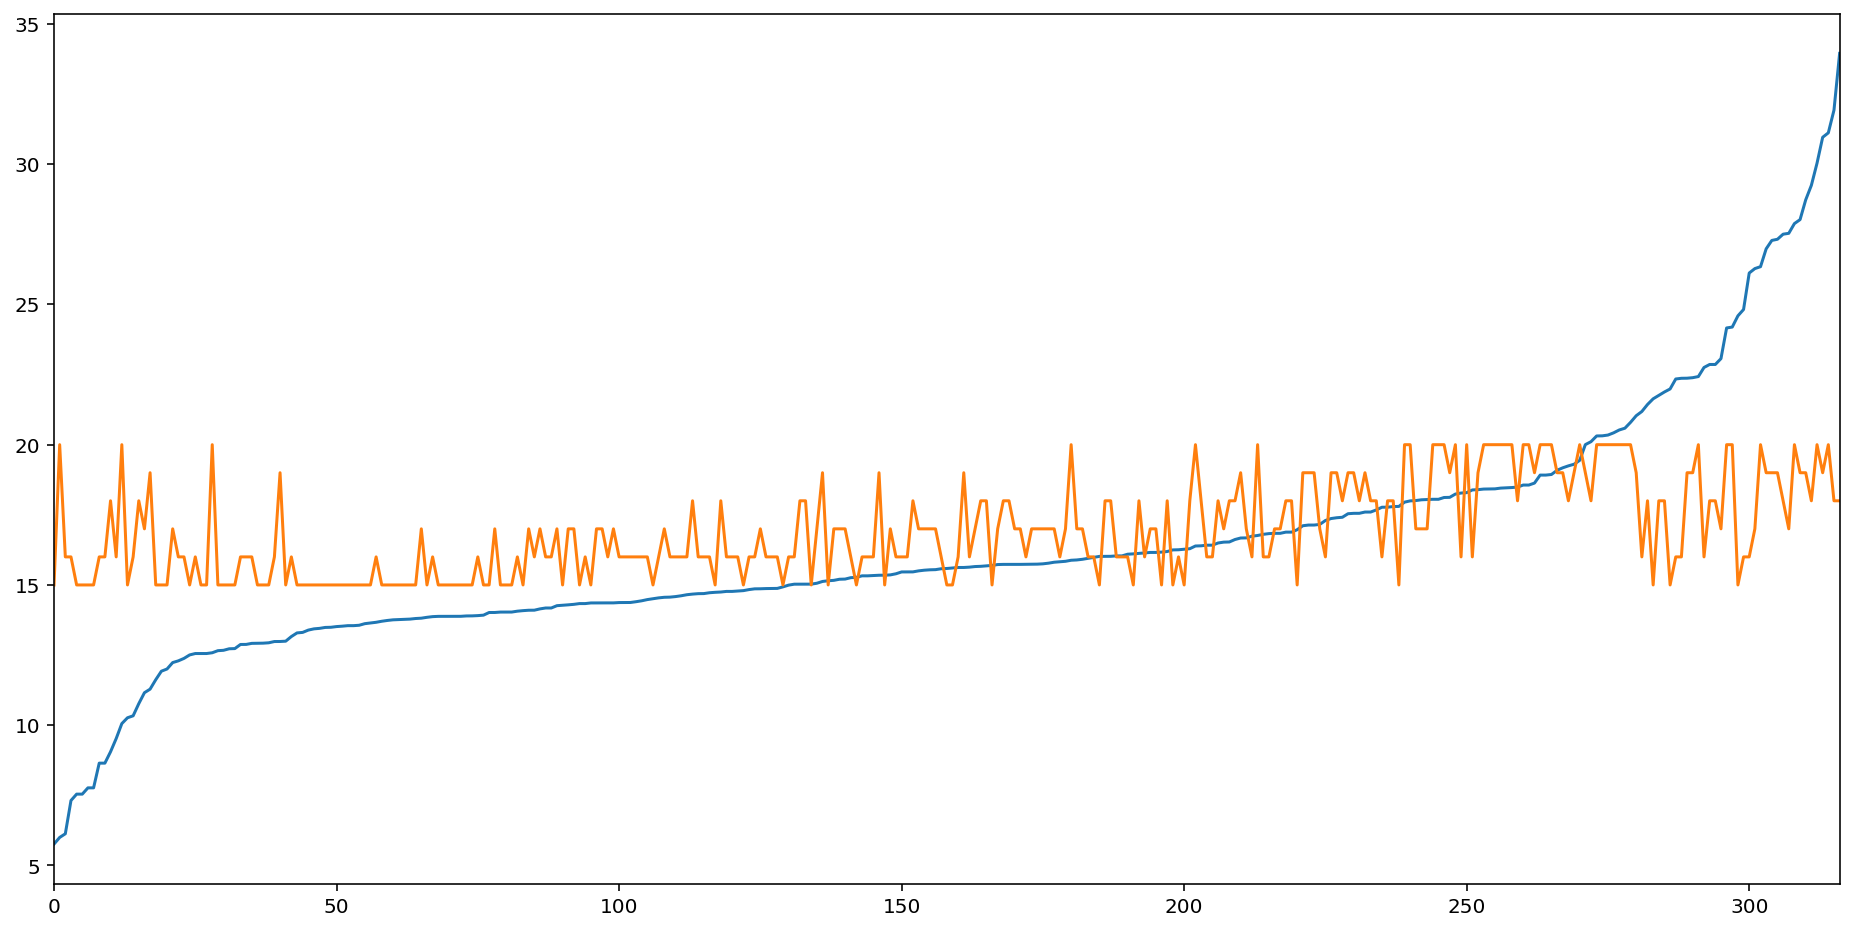

In [30]:
df_lim.CO2Intensity.plot(figsize=(16, 8)), df_lim.NbFlights.plot()

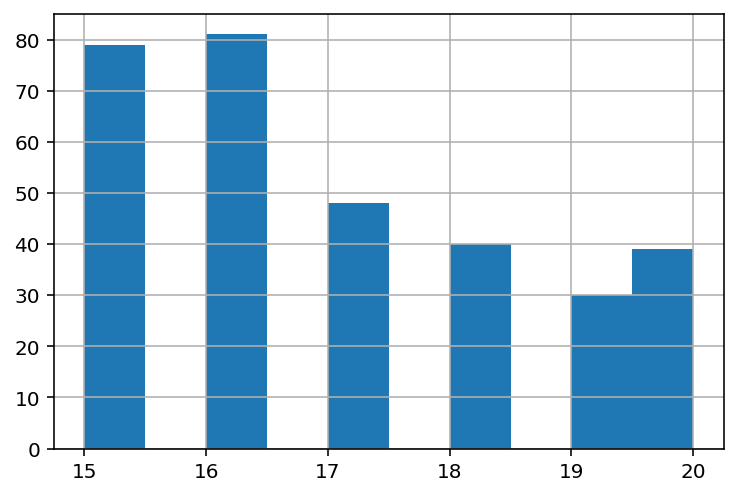

In [31]:
df_lim.NbFlights.hist()

In [32]:
df_lim['category'] = ''

In [33]:
df_lim.loc[df_lim.NbFlights > 17, 'category'] = 'high'
df_lim.loc[df_lim.NbFlights <= 17, 'category'] = 'low'

In [34]:
df_lim.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low


In [35]:
df_lim[df_lim.category == 'low'].head(15)

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category
0,46.79111,-71.393330,45.47055,-73.740830,15,5.763482,low
2,45.47055,-73.740830,46.79111,-71.393330,16,6.130586,low
3,42.95000,-87.900000,41.97861,-87.904720,16,7.315920,low
4,43.62750,-79.396110,45.32250,-75.669170,15,7.543500,low
5,45.32250,-75.669170,43.62750,-79.396110,15,7.543500,low
6,33.94250,-118.407200,32.73333,-117.183300,15,7.767180,low
7,32.73333,-117.183300,33.94250,-118.407200,15,7.767180,low
8,24.42056,118.344400,25.06972,121.552500,16,8.648200,low
9,25.06972,121.552500,24.42056,118.344400,16,8.648200,low
11,-35.30695,149.195000,-33.94611,151.177200,16,9.523800,low


In [36]:
df_lim['delta_lon'] = df_lim.apply(lambda df: radians(df.ArrLon - df.DepLon), axis=1)
df_lim['delta_lat'] = df_lim.apply(lambda df: radians(df.ArrLat - df.DepLat), axis=1)

df_lim['deplat_rad'] = df_lim.apply(lambda df: radians(df.DepLat), axis=1)
df_lim['arrlat_rad'] = df_lim.apply(lambda df: radians(df.ArrLat), axis=1)

In [37]:
df_lim.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027


In [38]:
def haversine(lat1, lat2, dlat, dlon):
    R = 6371
    h = sin(dlat / 2) ** 2 \
            + cos(lat1) \
            * cos(lat2) \
            * sin(dlon / 2) ** 2
    return 2 * R * asin(sqrt(h))

In [39]:
df_lim['distance'] = df_lim.apply(lambda df: haversine(df.deplat_rad, df.arrlat_rad, df.delta_lat, df.delta_lon), axis=1)

In [40]:
df_lim.distance.mean()

1023.583560848779

In [41]:
df_lim.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816


In [50]:
def hashkey(*cols):
    m = hashlib.md5()
    for col in cols:
        m.update(str(col).encode())
    return m.hexdigest()

In [51]:
df_lim['key'] = df_lim.apply(hashkey, axis=1)

In [52]:
df_lim.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance,key
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758,a83693bccc850b9cfd380249ae94af5c
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875,afe107bbcbc4f1a833353dddd9824ea8
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758,25990f664dee4d58f78a0fe1a60eeed9
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334,c6c5cc84cfce184589027ed1690c046a
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816,bdb0cef3cfafa6b50a9ba15a6cabec28


In [53]:
agg_total = df_lim[['NbFlights', 'CO2Intensity', 'distance']].sum()
agg_total

NbFlights         5367.000000
CO2Intensity      5176.760434
distance        324475.988789
dtype: float64

In [54]:
agg_low = df_lim[df_lim.category == 'low'][['NbFlights', 'CO2Intensity', 'distance']].sum()
agg_low

NbFlights         3297.000000
CO2Intensity      3090.180110
distance        207848.399004
dtype: float64

In [55]:
agg_high = df_lim[df_lim.category == 'high'][['NbFlights', 'CO2Intensity', 'distance']].sum()
agg_high

NbFlights         2070.000000
CO2Intensity      2086.580324
distance        116627.589785
dtype: float64

In [56]:
df_agg_total = pd.DataFrame(agg_total, columns=['total'])
df_agg_total

,total
NbFlights,5367.000000
CO2Intensity,5176.760434
distance,324475.988789


In [57]:
df_agg = pd.concat([
    pd.DataFrame(agg_low, columns=['low']),
    pd.DataFrame(agg_high, columns=['high']),
    pd.DataFrame(agg_total, columns=['total']),
], axis=1)
df_agg

,low,high,total
NbFlights,3297.000000,2070.000000,5367.000000
CO2Intensity,3090.180110,2086.580324,5176.760434
distance,207848.399004,116627.589785,324475.988789


In [58]:
high = df_lim[df_lim.category == 'high']

In [59]:
def concat_mean_agg(df, series, col, agg=None):
    agg = agg or 'mean'
    return df.join(
        pd.concat([
            pd.Series(
                serie.aggregate(agg),
                serie.index,
            ).rename(col) for serie in series
        ], axis=0)
    )

In [60]:
df_new = concat_mean_agg(
    df_lim,
    [
        df_lim[df_lim.category == 'high'].NbFlights,
        df_lim[df_lim.category == 'low'].NbFlights,
    ],
    'sum',
    agg='sum'
)

df_new = concat_mean_agg(
    df_new,
    [
        df_new[df_new.category == 'high'].NbFlights,
        df_new[df_new.category == 'low'].NbFlights,
    ],
    'mean',
    agg='mean'
)

In [82]:
df_new.head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance,key,sum,mean
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758,a83693bccc850b9cfd380249ae94af5c,3297,15.850962
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875,afe107bbcbc4f1a833353dddd9824ea8,2070,18.990826
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758,25990f664dee4d58f78a0fe1a60eeed9,3297,15.850962
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334,c6c5cc84cfce184589027ed1690c046a,3297,15.850962
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816,bdb0cef3cfafa6b50a9ba15a6cabec28,3297,15.850962


In [61]:
df_lim.groupby(by='category').NbFlights.aggregate('sum')

category
high    2070
low     3297
Name: NbFlights, dtype: int64

In [62]:
df_lim.join(df_lim.groupby('category').NbFlights.sum(), on='category', rsuffix='_sum').head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance,key,NbFlights_sum
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758,a83693bccc850b9cfd380249ae94af5c,3297
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875,afe107bbcbc4f1a833353dddd9824ea8,2070
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758,25990f664dee4d58f78a0fe1a60eeed9,3297
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334,c6c5cc84cfce184589027ed1690c046a,3297
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816,bdb0cef3cfafa6b50a9ba15a6cabec28,3297


In [63]:
df_lim.join(
    df_lim.groupby('category').NbFlights.mean(),
    on='category',
    rsuffix='_mean'
).head()

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance,key,NbFlights_mean
0,46.79111,-71.39333,45.470550,-73.74083,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758,a83693bccc850b9cfd380249ae94af5c,15.850962
1,5.15000,73.13000,4.191944,73.52917,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875,afe107bbcbc4f1a833353dddd9824ea8,18.990826
2,45.47055,-73.74083,46.791110,-71.39333,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758,25990f664dee4d58f78a0fe1a60eeed9,15.850962
3,42.95000,-87.90000,41.978610,-87.90472,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334,c6c5cc84cfce184589027ed1690c046a,15.850962
4,43.62750,-79.39611,45.322500,-75.66917,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816,bdb0cef3cfafa6b50a9ba15a6cabec28,15.850962


In [64]:
def aggregate(df, rows, key):  
    indexes = list(rows.index)
    kws = [
        (df.iloc[indexes[i]][key], row)
        for i, row in enumerate(rows)
    ]
    return tuple(kws)

In [65]:
cols = ['NbFlights', 'category']
serie = df_lim.category == 'high'

%time

r = df_lim[serie][cols].apply(lambda k: tuple(k), axis=1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [66]:
%time

r = aggregate(df_lim, df_lim.category, 'NbFlights')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [67]:
df_new

,DepLat,DepLon,ArrLat,ArrLon,NbFlights,CO2Intensity,category,delta_lon,delta_lat,deplat_rad,arrlat_rad,distance,key,sum,mean
0,46.791110,-71.393330,45.470550,-73.740830,15,5.763482,low,-0.040972,-0.023048,0.816659,0.793611,232.974758,a83693bccc850b9cfd380249ae94af5c,3297,15.850962
1,5.150000,73.130000,4.191944,73.529170,20,6.000000,high,0.006967,-0.016721,0.089884,0.073163,115.350875,afe107bbcbc4f1a833353dddd9824ea8,2070,18.990826
2,45.470550,-73.740830,46.791110,-71.393330,16,6.130586,low,0.040972,0.023048,0.793611,0.816659,232.974758,25990f664dee4d58f78a0fe1a60eeed9,3297,15.850962
3,42.950000,-87.900000,41.978610,-87.904720,16,7.315920,low,-0.000082,-0.016954,0.749619,0.732665,108.014334,c6c5cc84cfce184589027ed1690c046a,3297,15.850962
4,43.627500,-79.396110,45.322500,-75.669170,15,7.543500,low,0.065047,0.029583,0.761444,0.791027,350.609816,bdb0cef3cfafa6b50a9ba15a6cabec28,3297,15.850962
5,45.322500,-75.669170,43.627500,-79.396110,15,7.543500,low,-0.065047,-0.029583,0.791027,0.761444,350.609816,9a68a282435c916a9cd64c40225075bb,3297,15.850962
6,33.942500,-118.407200,32.733330,-117.183300,15,7.767180,low,0.021361,-0.021104,0.592408,0.571304,176.078023,db173eb27d6b75bba1a5c5f6c7946a1b,3297,15.850962
7,32.733330,-117.183300,33.942500,-118.407200,15,7.767180,low,-0.021361,0.021104,0.571304,0.592408,176.078023,062d559c7f92e75fdc61be5ded77545a,3297,15.850962
8,24.420560,118.344400,25.069720,121.552500,16,8.648200,low,0.055992,0.011330,0.426219,0.437549,331.903668,8a026558c933e3199a7a90cd751e76de,3297,15.850962
9,25.069720,121.552500,24.420560,118.344400,16,8.648200,low,-0.055992,-0.011330,0.437549,0.426219,331.903668,d2dca0cf306b6255e814f313a4fe5112,3297,15.850962


## Multi - indexing

In [68]:
arrays = [
    np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']),
    np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']),
]

In [69]:
df = pd.DataFrame(
    np.random.randn(8, 4),
    index=arrays,
    columns=['x1', 'x2', 'y1', 'y2']
)

In [70]:
df

x1        x2        y1        y2
bar one  0.280419 -1.224638  0.610930  0.070383
    two -1.465299  1.538338  1.683200  0.631955
baz one  0.466277  0.794184 -0.996080  0.938753
    two -0.139807  0.155500  2.080496 -2.827936
foo one -0.734964  1.551830 -0.302266  1.396339
    two  0.582141  0.813094 -0.949692  1.346359
qux one  1.894357 -1.324169 -1.825927  0.074648
    two -0.272855 -0.142504 -0.365927  1.682300

In [71]:
df.x1.bar.one

0.2804194394118508

In [72]:
df = pd.DataFrame(
    np.random.randn(8, 4),
    index=arrays,
    columns=[['x', 'x', 'y', 'y'], ['x1', 'x2', 'y1', 'y2']]
)

In [73]:
df

x                   y          
               x1        x2        y1        y2
bar one  0.874266 -0.505449 -0.366347 -1.196565
    two -0.444510  2.058969  2.455842  1.328739
baz one  0.114564 -0.607998  0.090931  0.230430
    two  1.088351 -0.375727 -1.093220 -0.175978
foo one -1.227899  0.901797  0.285116  0.046533
    two  0.364736 -0.652954 -0.651506  0.802438
qux one -0.055954  0.343885 -0.385521  0.566990
    two -2.572761 -2.216071 -0.951317  1.591406

In [74]:
df.x

x1        x2
bar one  0.874266 -0.505449
    two -0.444510  2.058969
baz one  0.114564 -0.607998
    two  1.088351 -0.375727
foo one -1.227899  0.901797
    two  0.364736 -0.652954
qux one -0.055954  0.343885
    two -2.572761 -2.216071

In [75]:
df.x.x1.bar.one

0.8742656955210838

In [76]:
import folium

In [77]:
centre = [
    df_lim.DepLat.sum() / df_lim.DepLat.size,
    df_lim.DepLon.sum() / df_lim.DepLon.size
]

map_osm = folium.Map(location=centre, zoom_start=5)

points = set(
    df_lim.apply(
        lambda df: tuple([df.DepLat, df.DepLon]), axis=1
    ).append(
        df_lim.apply(
            lambda df: tuple([df.ArrLat, df.ArrLon]), axis=1
        )
    )
)


pairs = set(df_lim.apply(
    lambda df: tuple([df.DepLat, df.DepLon, df.ArrLat, df.ArrLon]), axis=1
))


folium.Marker(centre,
    popup='Centroid',
    icon=folium.Icon(color='red',icon='info-sign')
).add_to(map_osm)


for point in points:
    folium.Marker(point,
        popup='Airport',
        icon=folium.Icon(color='blue',icon='info-sign')
    ).add_to(map_osm)


lines = []
for lat1, lon1, lat2, lon2 in pairs:
    lines.append(LineString([Point(lon1, lat1), Point(lon2, lat2)]))

In [78]:
from shapely.geometry import MultiLineString

In [79]:
geo_lines = mapping(MultiLineString(lines))

In [80]:
folium.GeoJson(geo_lines).add_to(map_osm)

In [81]:
map_osm